# Assignment-2

**Due Date:** 16.11.2022 

---------------------------------------

**Instructor:** Erkut Erdem

**TA:** Sibel Kapan

---------------------------------------

**Student:** Name Surname

**Github Classroom:** https://classroom.github.com/a/G-DSs1pj



## Part I: Theory Questions

Write your answers. You can add a picture or write it as a markdown.

#### Maximum Likelihood Estimate (MLE)

You have a coin that you think is biased, you flip it 5 times and get the sequence HT HT H. What is the maximum likelihood estimate for the probability of getting heads.

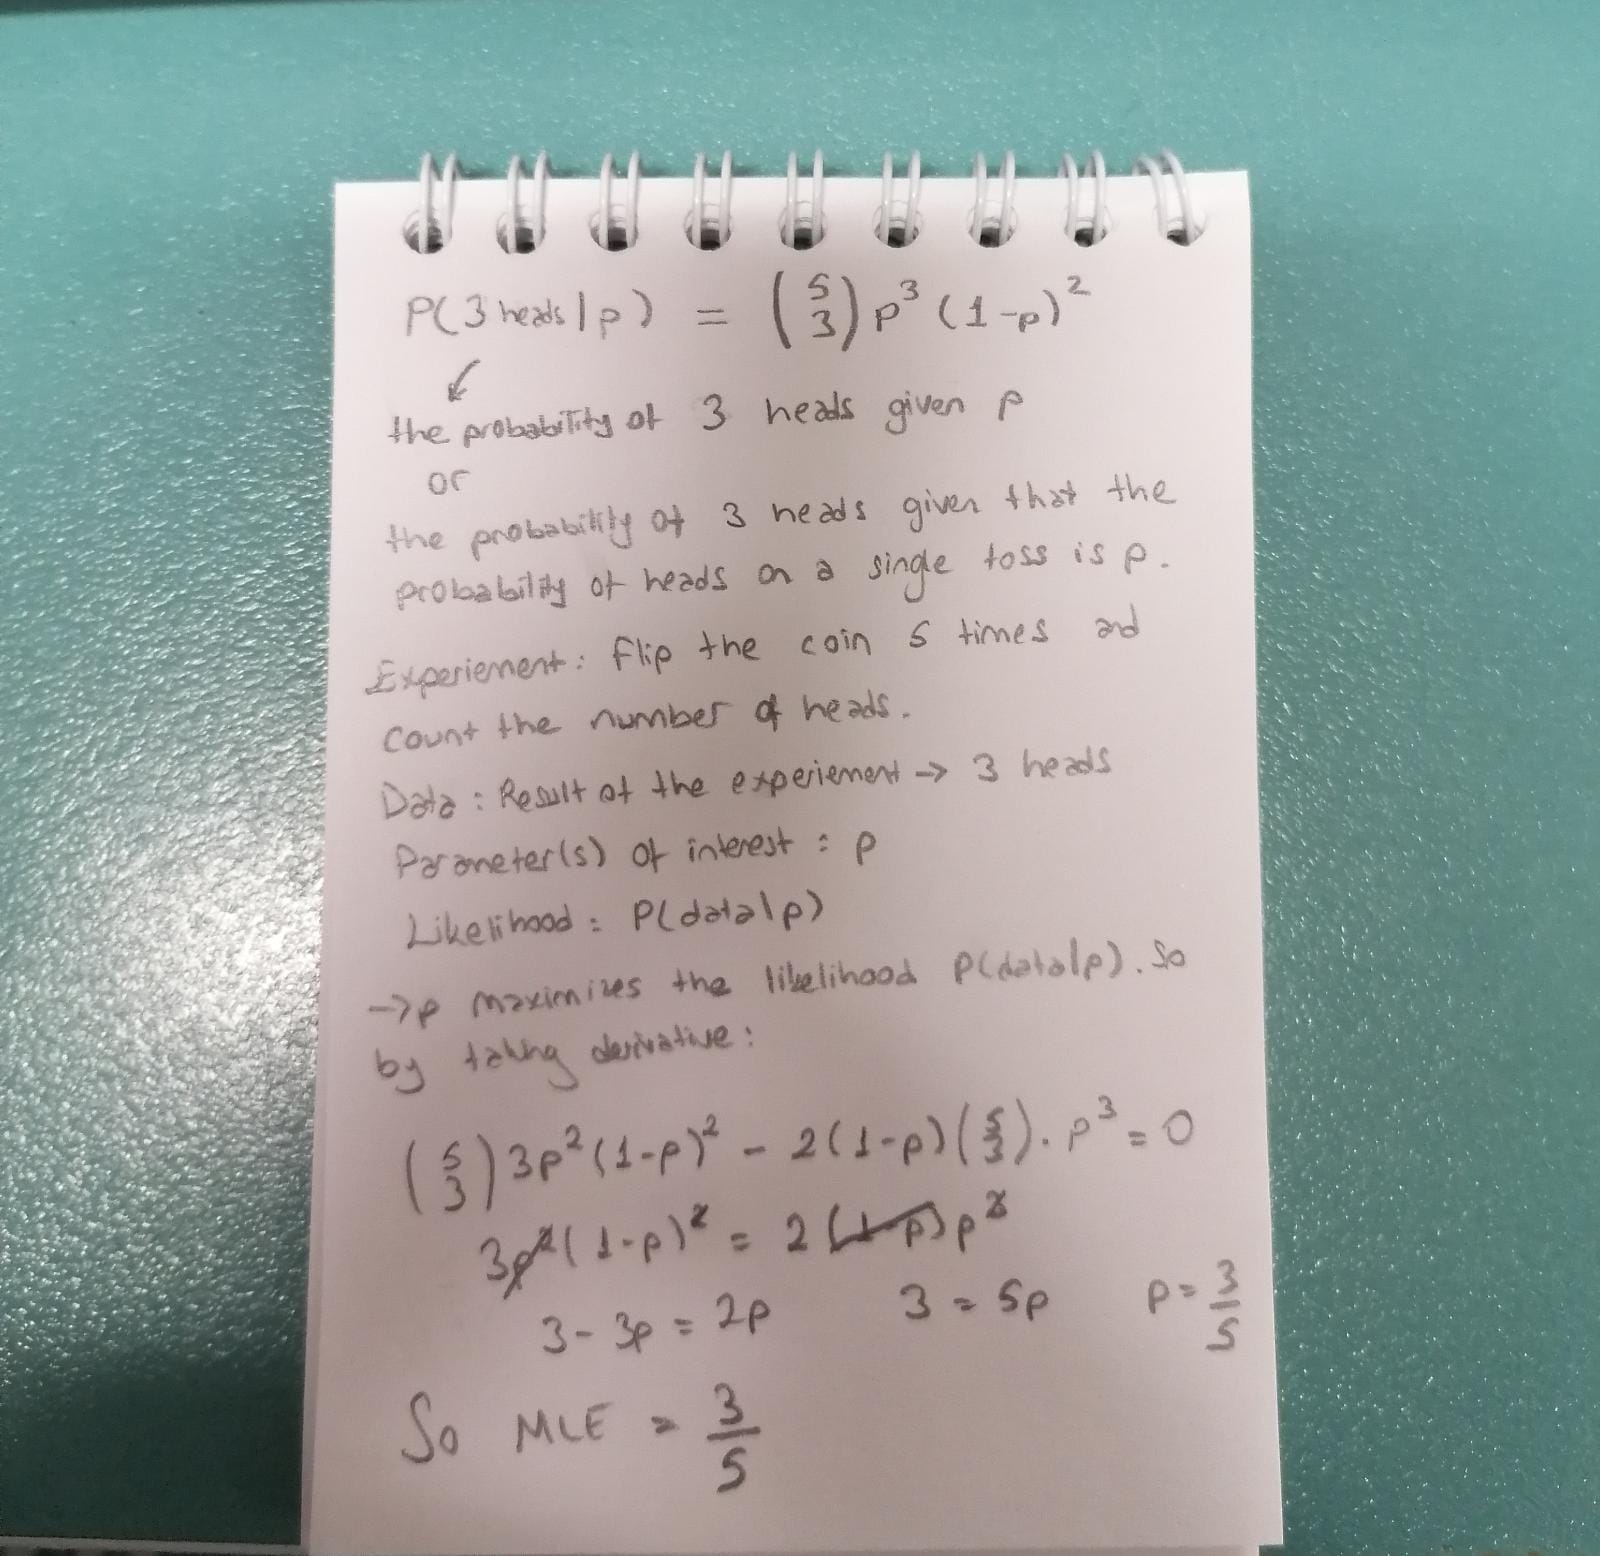

In [69]:
from IPython.display import Image
Image(filename='q1.PNG')

 You know that candy prices are normally distributed with mean µ and standard deviation σ. You have three candy pricing 2, 3, 5 lira. What is the maximum likelihood for µ?


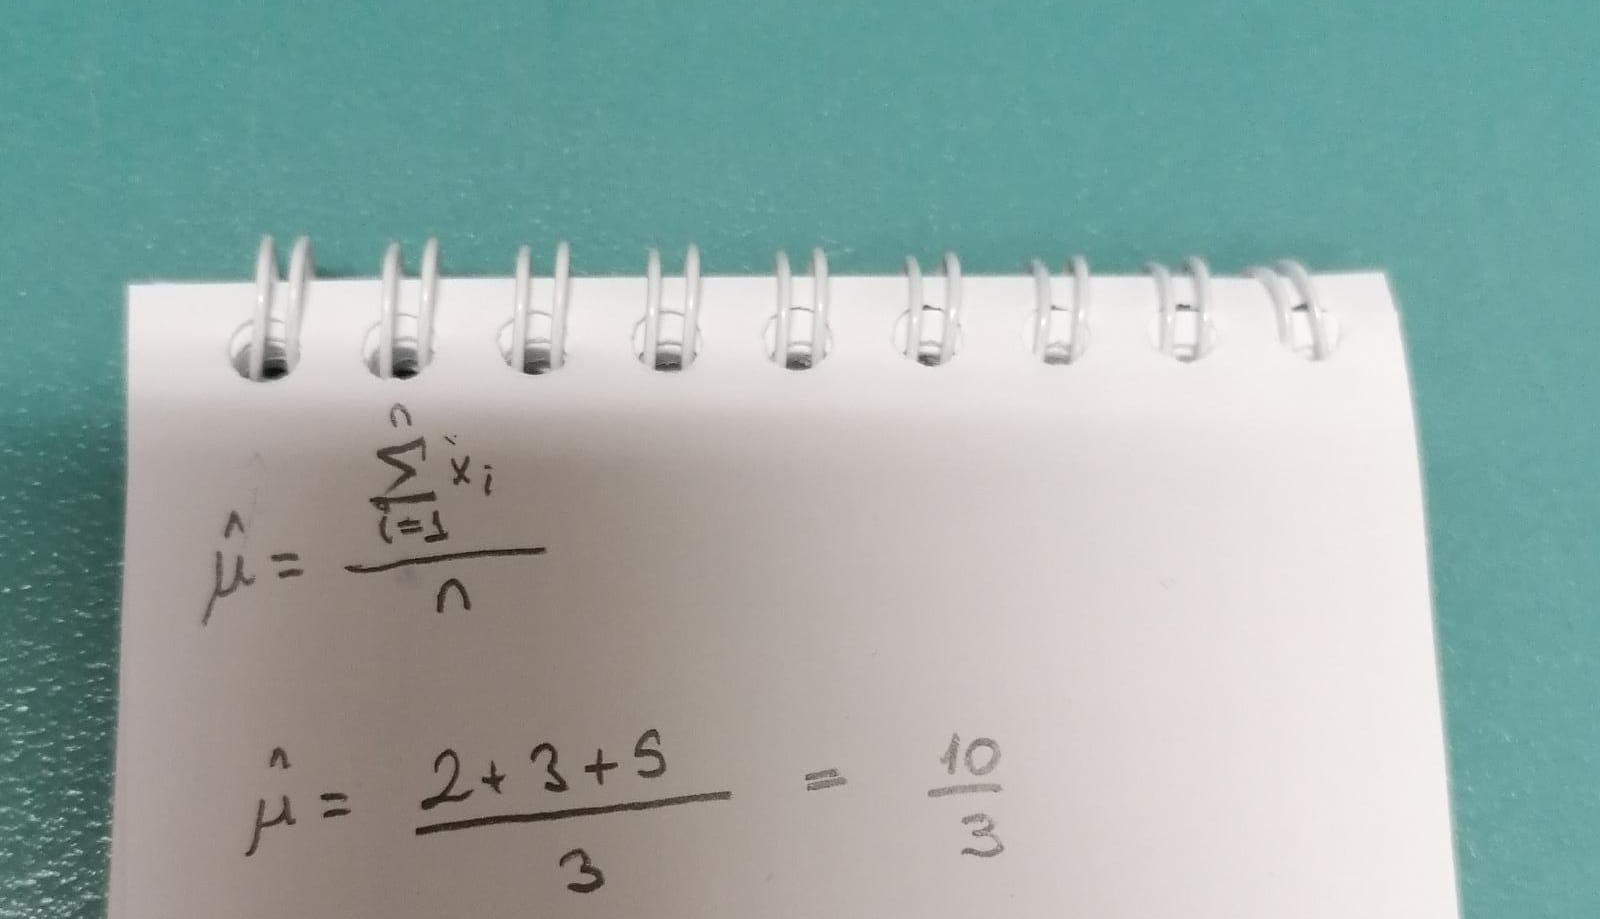

In [70]:
Image(filename='q2.JPEG')

Suppose that X is a discrete random variable with the following probability mass function: where 0 ≤ θ ≤ 1 is a parameter. The following 10 independent observations were taken from such a distribution: (3, 0, 2, 1, 3, 2, 1, 0, 2, 1). What is the maximum likelihood estimate of θ.

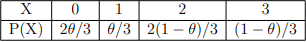

In [71]:
Image(filename='table1.PNG')

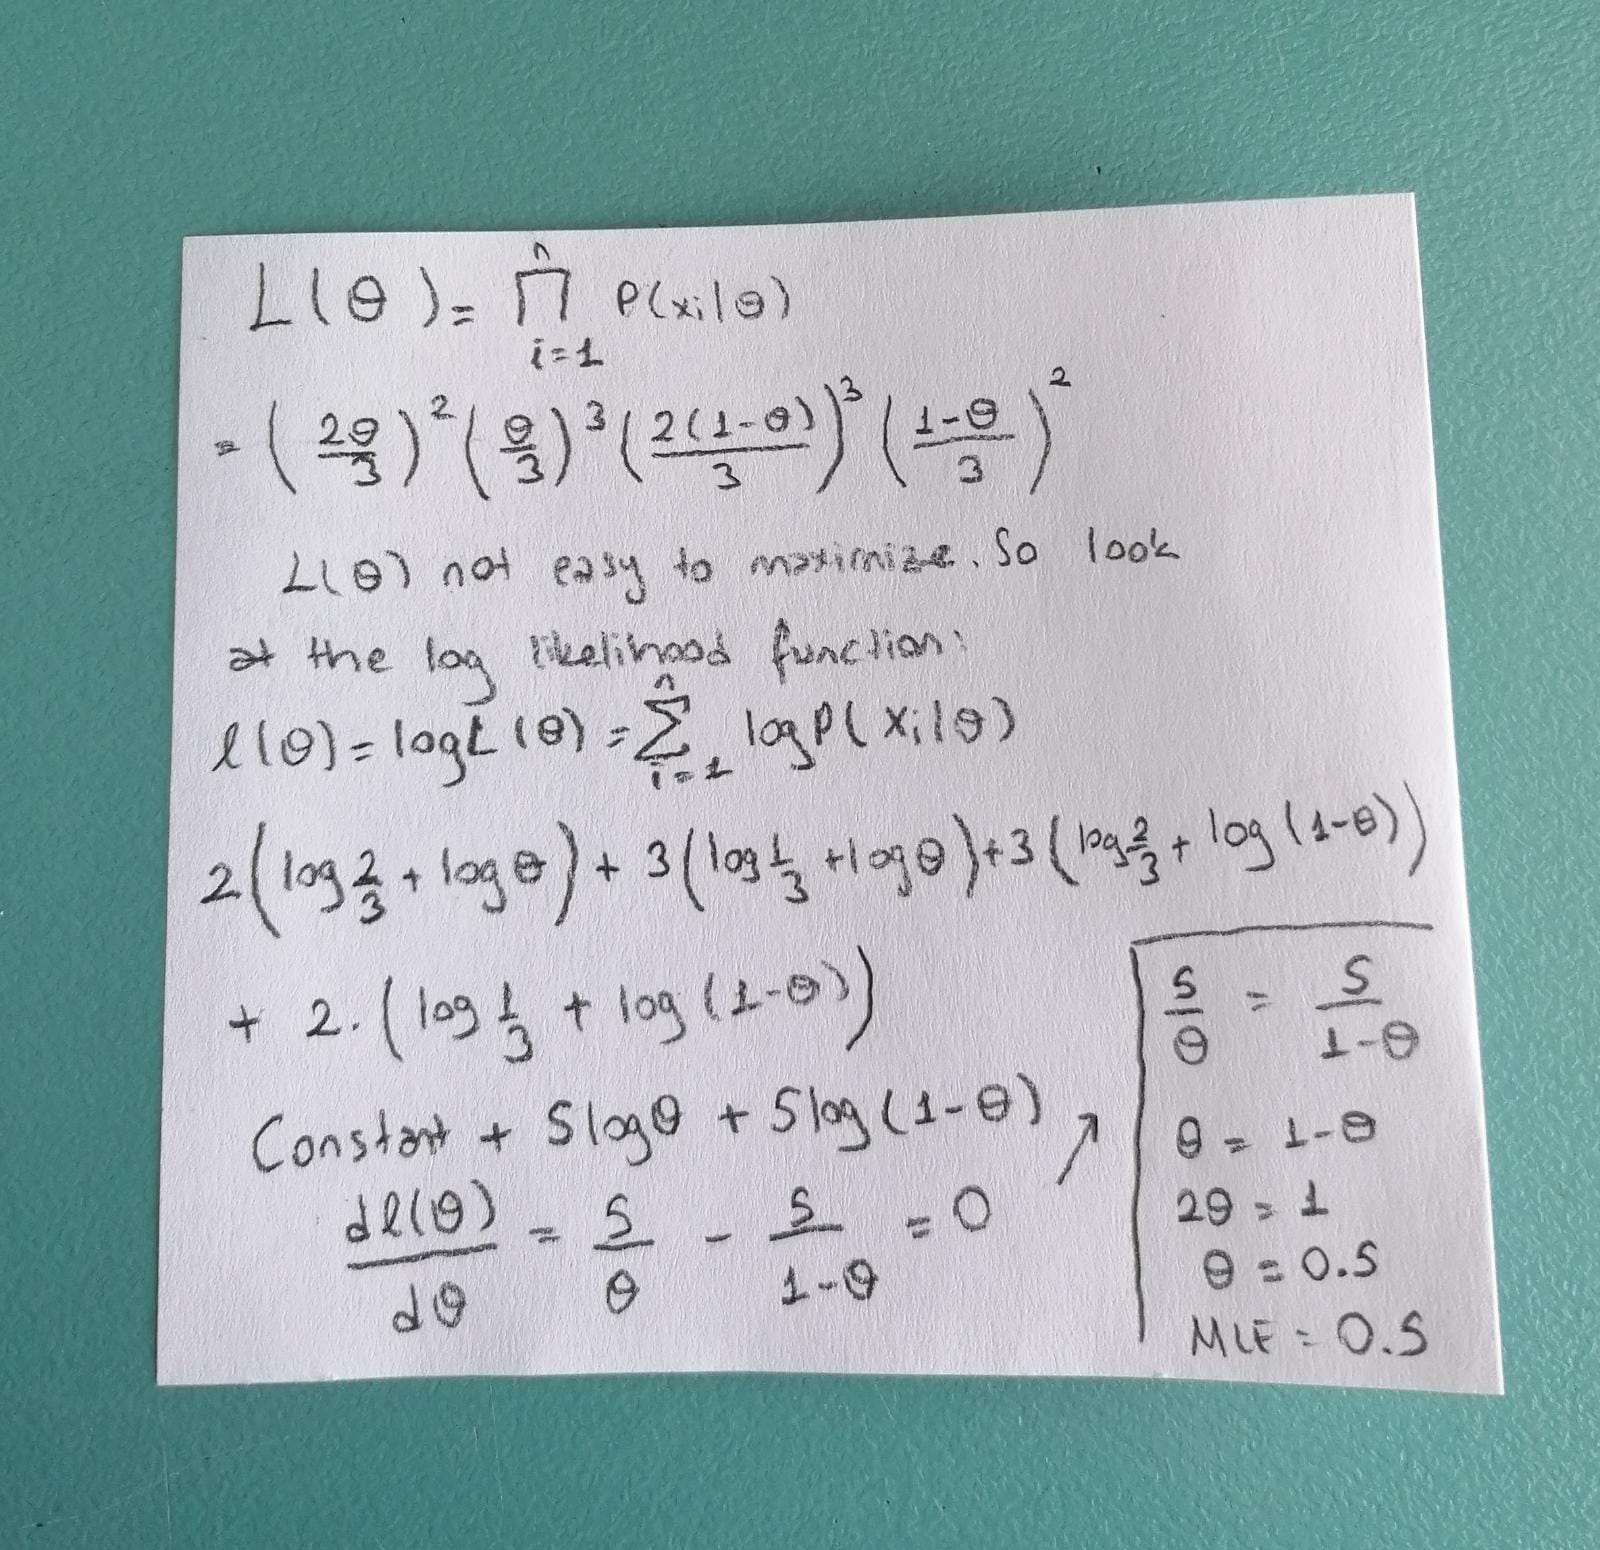

In [72]:
Image(filename='q3.JPEG')

Suppose that X1, ..., Xn form a random sample from a uniform distribution on the interval (0, θ), where of the parameter θ > 0 but is unknown. Please find MLE of θ.

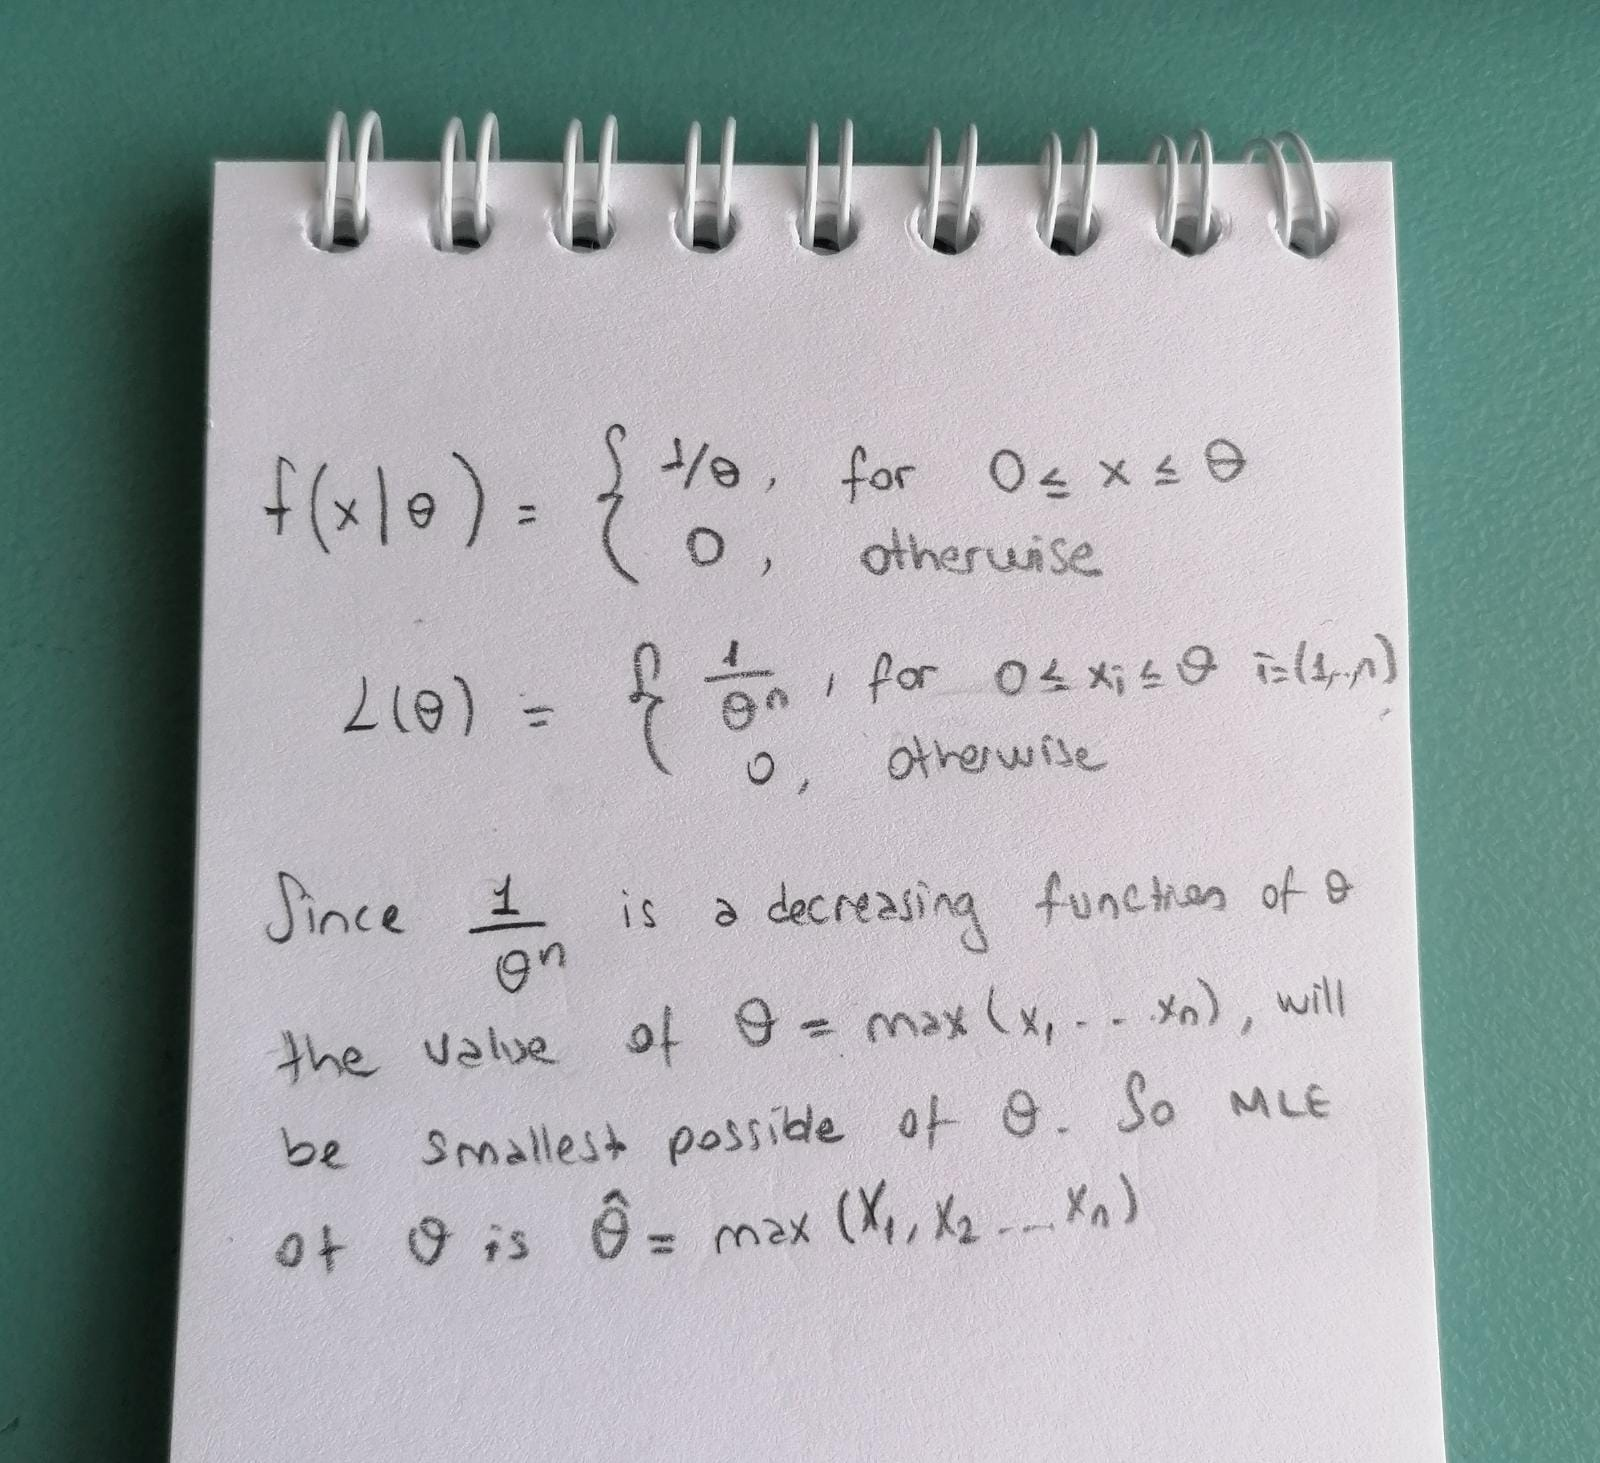

In [73]:
Image(filename='q4.JPEG')

#### Naive Bayes


The bank uses the information of its customers to give credits. The attributes used are sex, education, age , income and credit ( it can be yes or no). Can a male 23-year-old university graduate working class customer get a credit?


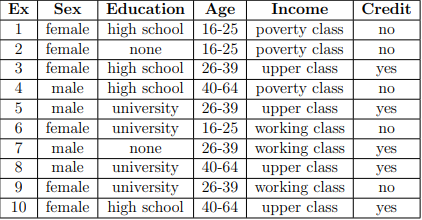

In [74]:
Image(filename='table2.PNG')

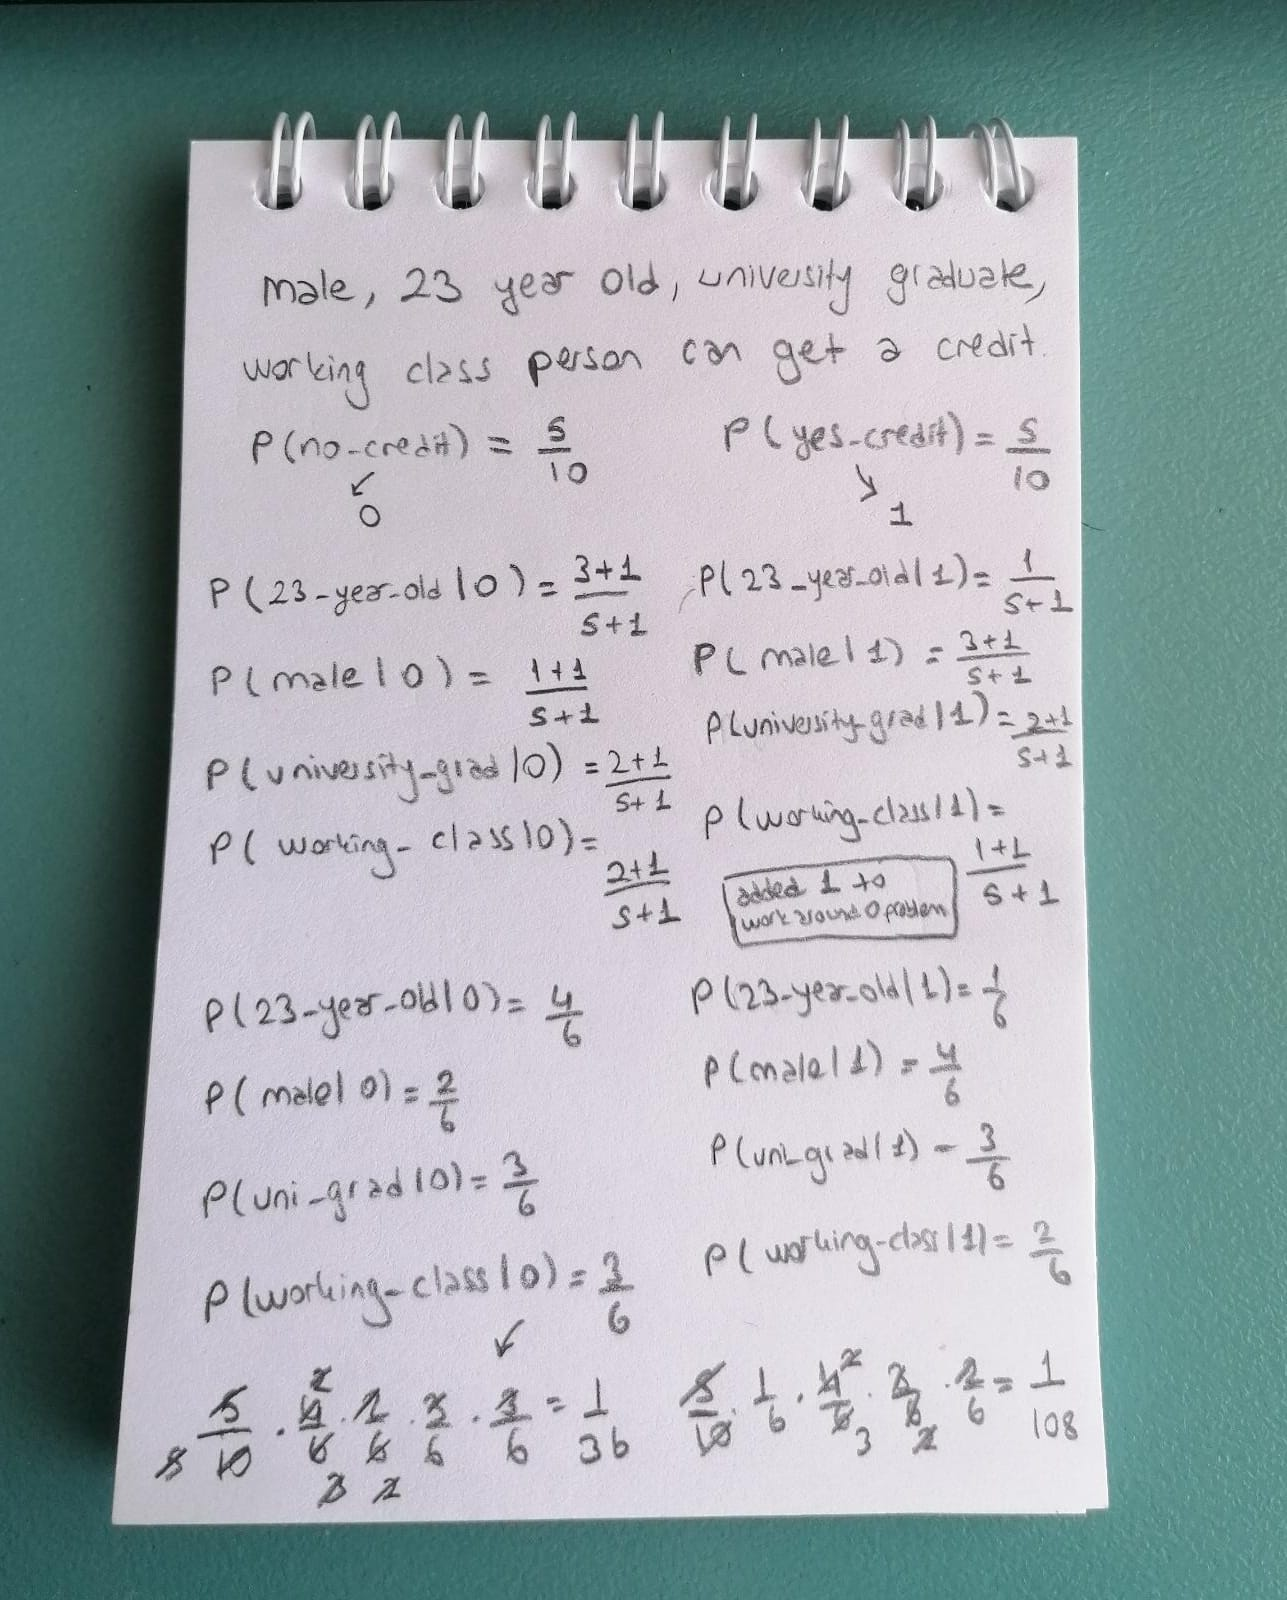

In [75]:
Image(filename='q5.JPEG')

## Part II: Book Genre Classification with Naive Bayes


Here the necessary libraries are imported.

In [76]:
import pandas as pd
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer


In [77]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\A\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Dataset Upload

Dataset uploaded from Drive or local

The dataset was loaded via the local csv file and the first five observations were suppressed to get an overview of the data.

In [78]:
df = pd.read_csv("book_dataset_a2.csv",delimiter="\t")
df.head()

,title,author,description,coverImg,genre
0,The Hunger Games,Suzanne Collins,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",There is a door at the end of a silent corrido...,https://i.gr-assets.com/images/S/compressed.ph...,Fantasy
2,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",Alternate cover edition of ISBN 9780679783268S...,https://i.gr-assets.com/images/S/compressed.ph...,Classics
4,Twilight,Stephenie Meyer,About three things I was absolutely positive.\...,https://i.gr-assets.com/images/S/compressed.ph...,Young Adult


When we examine the shape of the dataset, we can understand that we have a large number of observations. This will affect the working speed of the entire project and the memory used.

In [79]:
df.shape

(21079, 5)

When the data distribution of the genre class is examined, it can be observed that not every class is found equally.

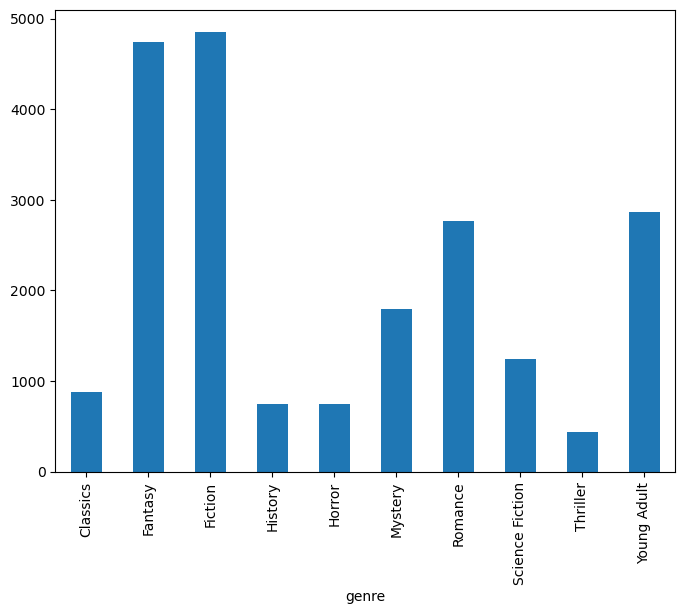

In [255]:
fig = plt.figure(figsize=(8,6))
df.groupby('genre').description.count().plot.bar(ylim=0)
plt.show()

#### 1. Understanding the data:

In this project, the genre of a book will be predicted based on the values in the description column. As a result of training the naive bayes model, which is created by separating train and test first, with train data, the model will learn which book genre is more related in which words. The important thing here is the frequency of the words seen by the model in the train data.

At this stage, a new dataframe is created by taking only the description and genre columns in df so that we can observe the relationships between the book genre and the words.

In [6]:
col = ['genre', 'description']
dff = df[col]
dff = dff[pd.notnull(df['description'])]
dff.columns = ['genre', 'description']
dff['category_id'] = dff['genre'].factorize()[0]
category_id_df = dff[['genre', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
dff.head()

,genre,description,category_id
0,Young Adult,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,0
1,Fantasy,There is a door at the end of a silent corrido...,1
2,Classics,The unforgettable novel of a childhood in a sl...,2
3,Classics,Alternate cover edition of ISBN 9780679783268S...,2
4,Young Adult,About three things I was absolutely positive.\...,0


Then, in order to find the relationships of these words with the genre, the relevant scores of the word are calculated using a statistical measure that evaluates how relevant a word, tfidfvectorizer.

In [7]:
tfidf = TfidfVectorizer()
features = tfidf.fit_transform(dff.description).toarray()
labels = dff.category_id
features.shape

(21079, 76267)

Then to find the terms that are the most correlated with each of the genre sklearn.feature_selection.chi2 is used.

In [9]:
N = 3
for genre, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    print("# '{}':".format(genre))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))

# 'Classics':
  . Most correlated unigrams:
. translation
. dickens
. betsy
# 'Fantasy':
  . Most correlated unigrams:
. magical
. dragon
. magic
# 'Fiction':
  . Most correlated unigrams:
. american
. she
. novel
# 'History':
  . Most correlated unigrams:
. hitler
. account
. history
# 'Horror':
  . Most correlated unigrams:
. cthulhu
. lovecraft
. horror
# 'Mystery':
  . Most correlated unigrams:
. killer
. case
. detective
# 'Romance':
  . Most correlated unigrams:
. sexy
. me
. my
# 'Science Fiction':
  . Most correlated unigrams:
. earth
. alien
. planet
# 'Thriller':
  . Most correlated unigrams:
. thriller
. robie
. reacher
# 'Young Adult':
  . Most correlated unigrams:
. boyfriend
. she
. school


For each genre, we can see the 3 words most associated with the genre. When the connection of words with genres is interpreted, we can see that some words are very predictable, and some words are irrelevant from the genre. For example, the words magical, dragon, magic for the Fantasy genre are the words that remind us of the Fantasy genre. However, the words me and my that appear in the Romance genre are the words that can be used in any sentence and do not directly remind us of the Romance genre. Therefore, some parameters such as stop_word are used. Most correlated words can be prevented from being meaningless words. Below, you can examine 3 words seen in the Thriller type, together with the statistically relevant values ​​that are formed as a result of tfidf vectorizer.

In [47]:
sum(features[:,np.where(tfidf.get_feature_names_out()=="reacher")[0][0]][dff.genre=="Thriller"])

9.794213219281598

In [48]:
sum(features[:,np.where(tfidf.get_feature_names_out()=="thriller")[0][0]][dff.genre=="Thriller"])

8.779835614661568

In [66]:
sum(features[:,np.where(tfidf.get_feature_names_out()=="magic")[0][0]][dff.genre=="Thriller"])

0.07554208994554108

Thus, when the model sees the word thriller, we can easily assume that the sample containing this word can be predicted as the thriller class. However, as it can be understood from the fact that the value of the word magic is much lower, if such a word comes up, the model is less likely to find this word relative with the thriller class. As a result, the genre of an unseen sample can be predicted with the words in the description.

#### Some necessary functions for preprocessing

This function is required for lowercase' returning, removing punctuation, words with length<=3, single character, HTML Tags, new line characters, multiple spaces, and cleaning unecessary text from the string.

In [80]:
def clean(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ',text)

    text_tokens = word_tokenize(text)
    text = (" ").join(text_tokens)

    splt = text.split(' ')
    output = [x for x in splt if len(x) > 3]
    text = (" ").join(output)

    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub('<.*?>+',' ',text)
    text = re.sub('\n', ' ',text)
    text = re.sub(r'\s+', ' ',text)
    return text

This function is required for Tokenization, Lemmetization, Stemming.

In [81]:
def data_preprocessing(text):
    tokens = word_tokenize(text)
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]
    tokens = [SnowballStemmer(language = 'english').stem(word) for word in tokens]
    return " ".join(tokens)

Applying preprocessing functions to dataset:

In [82]:
df['description'] = df['description'].apply(clean)

In [83]:
df['description'] = df['description'].apply(data_preprocessing)

#### Some necessary functions to be used in the Naive Bayes algorithm

This function retuns the occurrence probability of each class with a dict. In the Naive Bayes algorithm, these dict values are multiplied by the probability of each word appearing in that genre.

In [90]:
def class_probs(classes):

    probs = {}

    #Set a class index for each document as key
    for class_name in classes:
        probs[class_name] = 0

    #Get total number of documents
    total = len(classes)

    #Count the occurence of each class
    for line in classes:
        probs[line] += 1

    #Divide the count of each class by total documents
    for key in probs:
        probs[key] /= total

    return probs

This function uses Bag of Words (BoW) model which learns a vocabulary from all the documents, then models each document by counting the number of times each word appears. This is done using CountVectorizer.

In [91]:
def bag_of_words_ngram(data,stop_word, n_number=1):
    vct = CountVectorizer(ngram_range=(n_number, n_number),min_df = 3,stop_words=stop_word)
    ngram = vct.fit_transform(data)
    return ngram, vct.get_feature_names_out()

In this function, statistical measures that describe the relevance of words with genre are calculated using TfidfVectorizer.

In [92]:
def tf_idf_generator(data,stop_word):
    tf_idf = TfidfVectorizer(stop_words=stop_word,min_df = 3)
    tf_idf_vals = tf_idf.fit_transform(data)
    return tf_idf_vals, tf_idf.get_feature_names_out()

#### 2. Implementing Naive Bayes:

Three different functions, def __init__, def fit, def predict, were used to create the Naive Bayes algorithm. Here, it was aimed to test the algorithm for different experiments with the values given in init. Naive Bayes algorithm was used in different experiments by changing using stop_word, vectorizer and n_gram number to be used. While the fit function was created to train the model with the given Train data, the predict function was created to return the predicted results for the test data that the model had never seen.

In [93]:
from collections import defaultdict

class NaiveBayesClassifier:

    bow_spam = None
    bow_ham = None
    features = None
    n_number = None

    def __init__(self,isBoW,stop_word=None,n_number=1):
        self.isBoW = isBoW
        self.stop_word = stop_word
        self.n_number = n_number

    def fit(self, X, y):
        self.X = X
        self.y = y

        alpha = 1

        if self.isBoW:
            vectorizer_applied, feature_names = bag_of_words_ngram(X,self.stop_word, n_number=self.n_number)
        else:
            vectorizer_applied, feature_names = tf_idf_generator(X, self.stop_word)

        self.features = feature_names

        number_of_features = vectorizer_applied.shape[1]

        bow_applied_genre_dict = {genre:None for genre in y.unique()}
        genre_word_matrix_dict = {genre:None for genre in y.unique()}
        freq_dict = {genre:None for genre in y.unique()}
        freq_genre_smooth = {genre:None for genre in y.unique()}
        for genre in y.unique():
            empty_dict = defaultdict(lambda: False)
            bow_applied_genre_dict[genre] = empty_dict
            matrix = vectorizer_applied[y == genre]
            genre_word_matrix_dict[genre]= matrix
            freq = np.sum(matrix)
            freq_dict[genre] = freq
            freq_smooth = freq + number_of_features
            freq_genre_smooth[genre] = freq_smooth

        for index in range(len(feature_names)):
            feature = feature_names[index]
            if not feature[0].isdigit():
                for genre in y.unique():
                    freq_in_genre = np.sum(genre_word_matrix_dict[genre][:, index])
                    genre_prob = None
                    if freq_in_genre == 0:
                        freq_in_genre = alpha
                        genre_prob = freq_in_genre / (freq_genre_smooth[genre] + alpha)
                    else:
                        genre_prob = freq_in_genre / (freq_dict[genre])

                    bow_applied_genre_dict[genre][feature] = genre_prob

        self.bow_applied_genre_dict = bow_applied_genre_dict

    def predict(self, X):
        classProbs = class_probs(self.y.unique())
        results = []
        alpha = 1
        for sample in (X):
            sum_of_log_dict =  {genre: np.log(classProbs[genre]) for genre in self.y.unique()}
            tokens = sample.split()
            for index in range(len(tokens) - (self.n_number - 1)):
                word = " ".join(tokens[index:index + self.n_number])
                for genre in self.y.unique():
                    if not self.bow_applied_genre_dict[genre][word]:
                        genre_prob = alpha / (len(self.features)+alpha)
                    else:
                        genre_prob = self.bow_applied_genre_dict[genre][word]

                    sum_of_log_dict[genre] += np.log(genre_prob)

            final_probs = sorted(sum_of_log_dict.items(), key=lambda item: item[1],reverse=True)
            prediction = final_probs[0][0]
            results.append(prediction)
        return np.array(results)

Splitting data into train and test data for model training and testing.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df["description"], df["genre"], test_size = 0.2,random_state = 0)

#### Experiment 1: Creating BoW unigram Naive Bayes model with extracting stop_words

In [95]:
unigram_model = NaiveBayesClassifier(True,'english',1)
unigram_model.fit(X_train,y_train)

In [96]:
unigram_predictions = unigram_model.predict(X_test)

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, unigram_predictions)

0.6463472485768501

#### Experiment 2: Creating BoW unigram Naive Bayes model without extracting stop_words

In [98]:
unigram_model_ = NaiveBayesClassifier(True)
unigram_model_.fit(X_train,y_train)

In [99]:
unigram_predictions_ = unigram_model_.predict(X_test)

In [100]:
accuracy_score(y_test, unigram_predictions_)

0.6394686907020873

#### Experiment 3: Creating BoW bigram Naive Bayes model with extracting stop_words

In [101]:
bigram_model = NaiveBayesClassifier(True,'english',2)
bigram_model.fit(X_train,y_train)

In [102]:
bigram_predictions = bigram_model.predict(X_test)

In [103]:
accuracy_score(y_test, bigram_predictions)

0.5246679316888045

#### Experiment 4: Creating BoW bigram Naive Bayes model without extracting stop_words

In [104]:
bigram_model_ = NaiveBayesClassifier(True,None,2)
bigram_model_.fit(X_train,y_train)

In [105]:
bigram_predictions_ = bigram_model_.predict(X_test)

In [106]:
accuracy_score(y_test, bigram_predictions_)

0.5308349146110057

#### Experiment 5: Creating tfidf Naive Bayes model with extracting stop_words

In [107]:
tfidf_model = NaiveBayesClassifier(False,'english')
tfidf_model.fit(X_train,y_train)

In [108]:
tfidf_predictions = tfidf_model.predict(X_test)

In [109]:
accuracy_score(y_test, tfidf_predictions)

0.6155123339658444

#### Experiment 6: Creating tfidf Naive Bayes model without extracting stop_words

In [110]:
tfidf_model_ = NaiveBayesClassifier(False)
tfidf_model_.fit(X_train,y_train)

In [111]:
tfidf_predictions_ = tfidf_model_.predict(X_test)

In [112]:
accuracy_score(y_test, tfidf_predictions_)

0.6102941176470589

#### 3. Error Analysis

Find a few misclassified books and comment on why you think they were hard to classify.

In [113]:
count = 0
misclassified = []
for genre in y_test:
    if (genre) != unigram_predictions[count]:
        misclassified.append(count)
    count +=1
    if len(misclassified) > 3:
        break

In [114]:
for index in misclassified:
    print("Model predicted as: ",unigram_predictions[index])
    print("Actual genre is: ",y_test.array[index])
    print("The sample is: ",X_test.array[index])

Model predicted as:  Young Adult
Actual genre is:  Science Fiction
The sample is:  thousand them have live underground they live there long there onli legend about peopl live anywher els such life requir rule strict rule there thing that must discuss like go outsid never mention might like go outsid what wish
Model predicted as:  Thriller
Actual genre is:  Fiction
The sample is:  this brilliant novel with univers reson dure 1990s sieg sarajevo tell stori three peopl tri surviv citi rife with extrem fear desper time sorrow cellist play undaunt their midst shell land bread line kill twenti peopl cellist watch from window flat vow hollow where mortar fell play albinoni adagio onc each twenti victim adagio been creat from fragment after onli extant score firebomb dresden music librari fact that been rebuilt differ compos into someth worthwhil give cellist hope meanwhil kenan steel himself week walk through danger street collect water famili other side town dragan kenan doesn know tri make 

We see 3 different examples where the model predicts different from the real genre. One of the reasons why it is difficult to predict them correctly is that some of the words they contain have high relativity for both genres. Another reason is that there are different words in the sample that have high relativity for both genres. For example, in the last sentence, the word kill has a high probability for the thriller genre, while the word family can have a high probability for the young adult, in the same way. Another factor that comes into play here is that the probability of classes is also important. When we compare the young adult and science fiction classes, the young adult is more likely to classify the model sample as a young adult since it has a higher probability.

#### 4. Modul Analysis

##### a) Analyzing effect of the words on prediction

For each genre class;
• List the 10 words whose presence most strongly predicts the genre of the book.
• List the 10 words whose absence most strongly predicts the genre of the book.

In [115]:
tfidf = TfidfVectorizer()

In [117]:
for genre in dff["genre"].unique():

    result = tfidf.fit_transform(dff[dff["genre"]==genre].description)
    feature_names = tfidf.get_feature_names_out()
    feature_array = np.array(tfidf.get_feature_names_out())
    tfidf_sorting = np.argsort(result.toarray()).flatten()[::-1]

    n = 10
    top_n = feature_array[tfidf_sorting][:n]
    print("Word whose presence most strongly in ",genre,":",top_n)
    least_n = feature_array[tfidf_sorting][-n:]
    print("Words whose absence most strongly in ", genre,":",least_n)

Word whose presence most strongly in  Young Adult : ['dove' 'benjamin' 'summer' 'children' 'award' 'themes' 'book' 'awards'
 'film' 'international']
Words whose absence most strongly in  Young Adult : ['playing' 'pleads' 'playlist' 'playlists' 'playmate' 'plays' 'playwright'
 'pld' 'pleading' '00']
Word whose presence most strongly in  Fantasy : ['kara' 'scurry' 'elevators' 'monkeys' 'rookie' 'hurtles' '2011' 'petty'
 'balls' 'officer']
Words whose absence most strongly in  Fantasy : ['pinpoint' 'pinpointing' 'pinpont' 'pins' 'pinto' 'pinups' 'pio'
 'pioneer' 'pioneering' '00']
Word whose presence most strongly in  Classics : ['chronologically' 'fictionalised' 'headings' '1665' 'roughly' 'sections'
 'struck' 'plague' 'the' 'chapter']
Words whose absence most strongly in  Classics : ['physical' 'phyllis' 'phronsie' 'phrases' 'photos' 'photographs'
 'photographic' 'phonetics' 'phoenix' '000']
Word whose presence most strongly in  Science Fiction : ['unrest' 'seething' 'bid' 'malevolent' 

During Experiment 5 and experiment 6, tfidf aproach was used while creating the naive bayes model. While the stop_word parameter was used during Experiment 5, it was not used during Experiment 6. Although the results were close to each other as Accuracy, it was more advantageous to use stop_word. In addition, the results obtained in both experiments using tfidf gave better results than bow models using bigram. Thus, the on task effect of using specific words using tfidf was easily observable.

I used the results from tfidf while calculating probability for each new incoming word within the Naive Bayes algorithm. If there is a word seen while training the model, I calculated the probability by using the tfidf result of this word that I kept in the dictionary before. (Here is an important point I would like to add for the whole project. np.log has always been used when calculating probabilities. This is to avoid numeric underflow.)

To compare the influence of absence and presence words, words whose presence most strongly predicts have always had a higher probability for that genre. For tfidf, this can be explained by relativity. On the contrary, words whose absence most strongly predicts has always had the lowest probability values ​​for that genre.

##### b) Stop Words:
List the 10 non-stop words that most strongly predict that the book genre is ’Fantasy’ and the 10 non-stop words that most strongly predict that the book genre is ’Mystery’.

In [120]:
tfidf = TfidfVectorizer(stop_words='english')
for genre in ["Fantasy","Mystery"]:
    result = tfidf.fit_transform(dff[dff["genre"] == genre].description)
    feature_names = tfidf.get_feature_names_out()
    feature_array = np.array(tfidf.get_feature_names_out())
    tfidf_sorting = np.argsort(result.toarray()).flatten()[::-1]

    n = 10
    top_n = feature_array[tfidf_sorting][:n]
    print("Word whose presence most strongly in ", genre, ":", top_n)

Word whose presence most strongly in  Fantasy : ['kara' 'scurry' 'elevators' 'monkeys' 'rookie' 'hurtles' '2011' 'petty'
 'balls' 'officer']
Word whose presence most strongly in  Mystery : ['david' 'anasazi' 'chime' 'michaels' 'thirteenth' 'sequel' 'headed'
 'desert' 'arrived' 'emma']


As can be seen, when the stop_word parameter is included in tfidf, the results for Mystery genre have changed, and words with stop_word such as he are not included.

##### c) Analyzing effect of the stop words

Stopwords are generally infrastructural words that contain the basic information of our spoken language. We don't want these to affect our model. Because the words that are outside of these actually allow us to reach the meaning that we really need to focus on. However, sometimes when we remove words such as "not", "no" from the sentence, the meaning of the sentence can be reversed. This can produce results that we do not want.

#### 5. Calculation of Accuracy

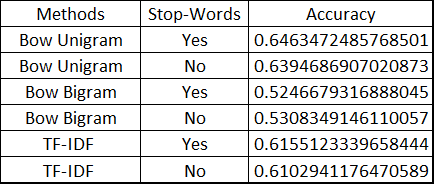

In [121]:
Image(filename='acc_table.PNG')

#### 6. (Bonus) Multimodal Deep Learning

In this part, you can use a ready-made image classification method to classify book cover pictures and genres. You are expected to try early or late fusion methods to classify by combining cover images and description data.